# __LAB 11__
### __Support Vector Machines__
#### Q1.

#### Preprocessing & Visualisation

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


data = pd.read_csv('./BankNote_Authentication.csv')
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [101]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


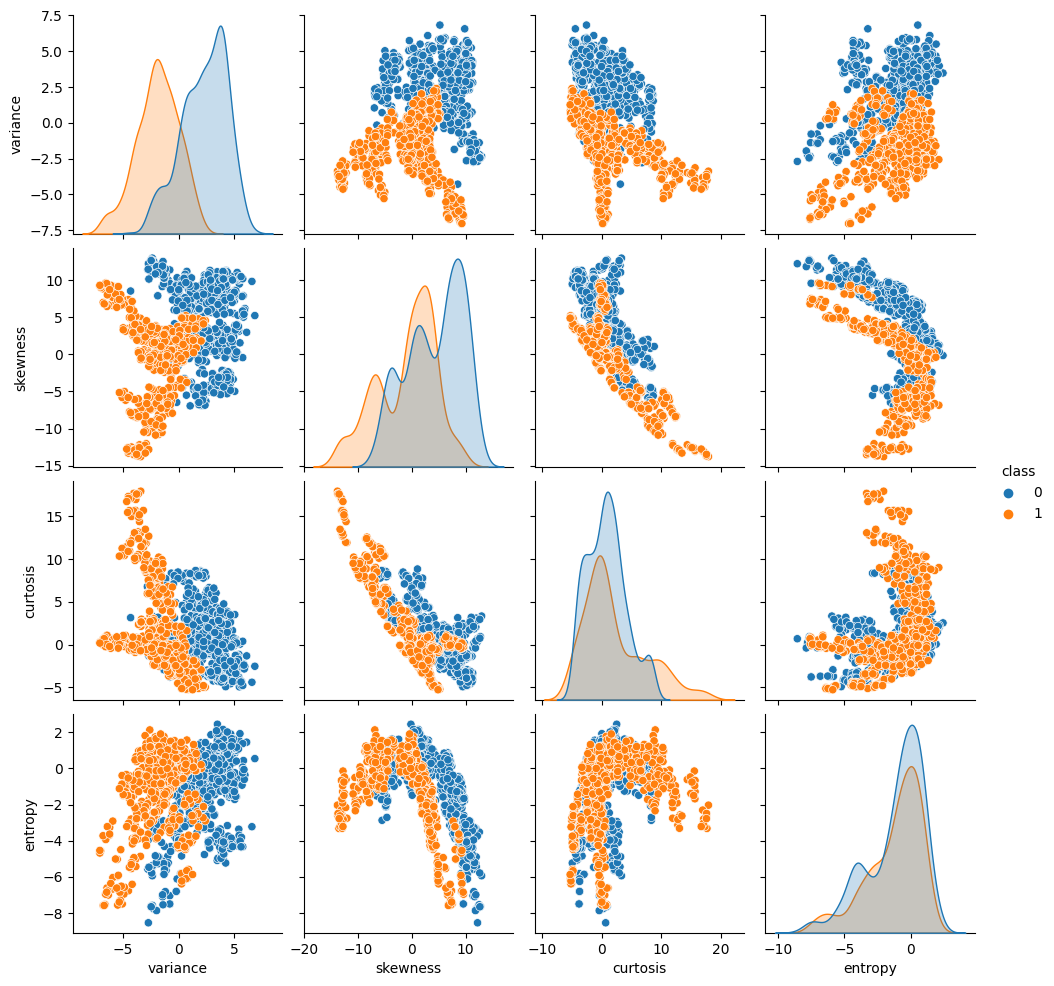

In [102]:
sns.pairplot(data, hue="class")

#### Correlation Matrix

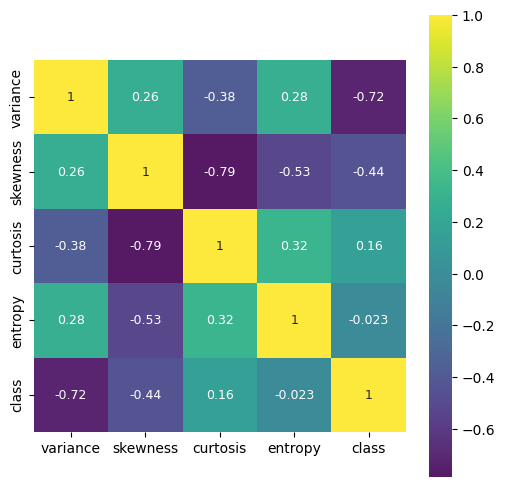

In [103]:
corr = data.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr, cbar = True, square = True, cmap='viridis', annot_kws={'size': 9}, annot=True, alpha = 0.9)
plt.show()


#### Normalization & Splitting

In [108]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

columns = X.columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=columns)

selected_cols = ["variance", "curtosis"]
X = X[selected_cols]
# X.head()

from sklearn.model_selection import train_test_split
X_train, X_2, y_train, y_2 = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42) 
X_test, X_valid, y_test, y_valid = train_test_split(X_2, y_2, train_size=0.66, test_size=0.33, random_state=42)




#### SVM with varying C

In [114]:
# function to plot decision boundary 

def plot_db(x_train, y_train, model=None, title = None):
  h = 0.02
  x_min, x_max = x_train[x_train.columns[0]].min() - 10*h, x_train[x_train.columns[0]].max() + 10*h
  y_min, y_max = x_train[x_train.columns[1]].min() - 10*h, x_train[x_train.columns[1]].max() + 10*h
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  X_preds = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
  X_preds.columns = x_train.columns
  y_preds = model.predict(X_preds)
  y_preds = np.array(y_preds).reshape(xx.shape)

  plt.figure(figsize=(5,5))
  plt.contourf(xx, yy, y_preds,  alpha=0.25)
  plt.contour(xx, yy, y_preds, colors='k', linewidths=0.7)
  plt.title(title)
  plt.scatter(x_train[x_train.columns[0]], x_train[x_train.columns[1]], c = np.array(y_train),  edgecolors='k')

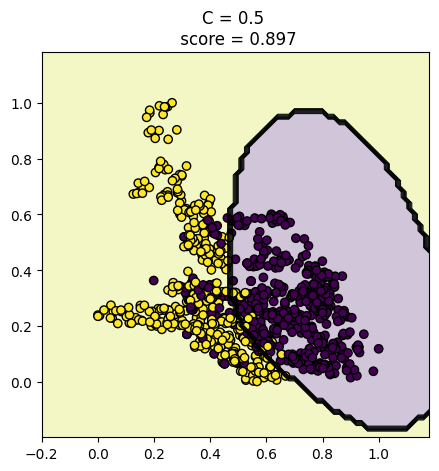

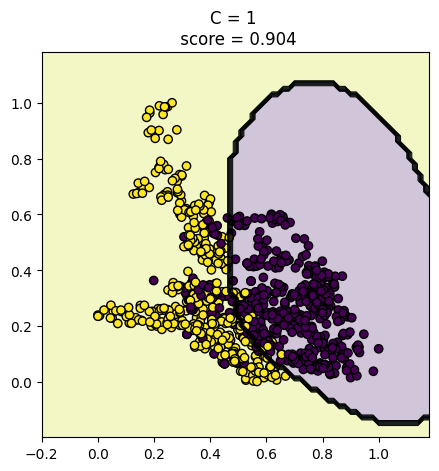

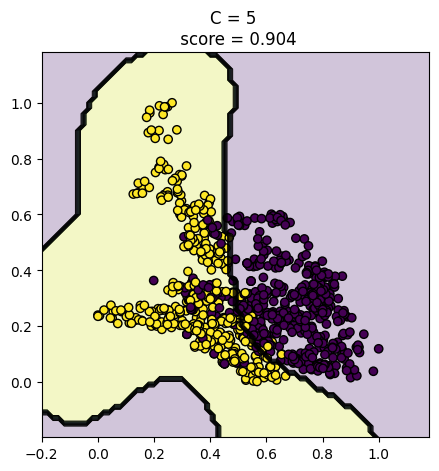

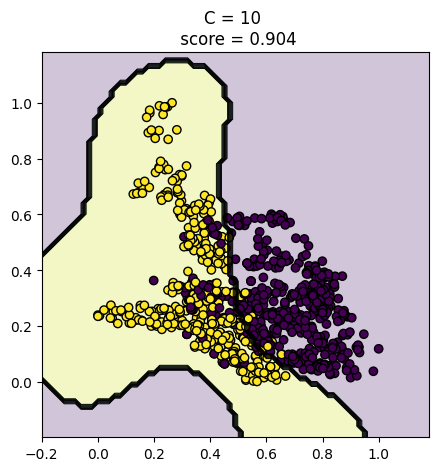

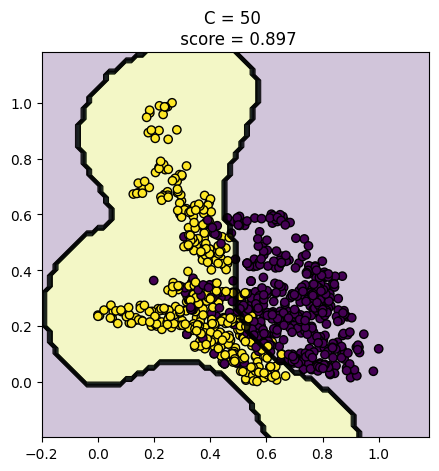

In [122]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

c = [0.5, 1, 5, 10, 50]
for each in c:
    clf = SVC(C=each).fit(X_train, y_train)
    plot_db(X_train, y_train, clf, "C = {} \n score = {}".format(each, round(clf.score(X_valid, y_valid), 3)))


#### SVM with varying kernels

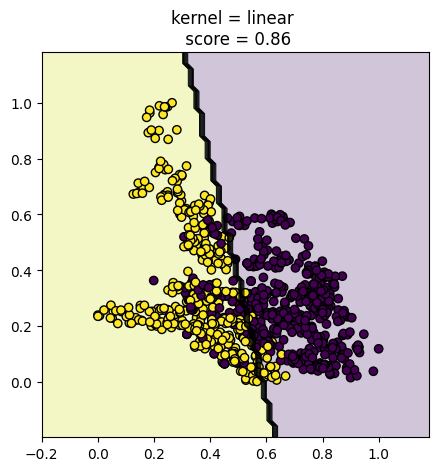

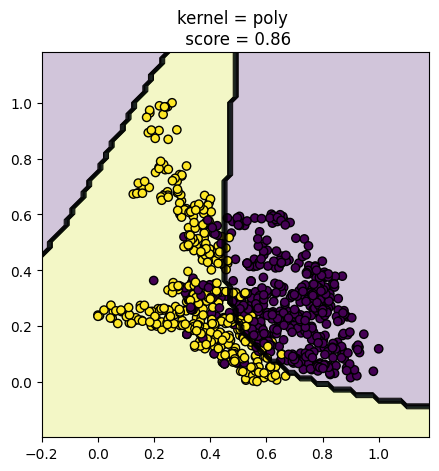

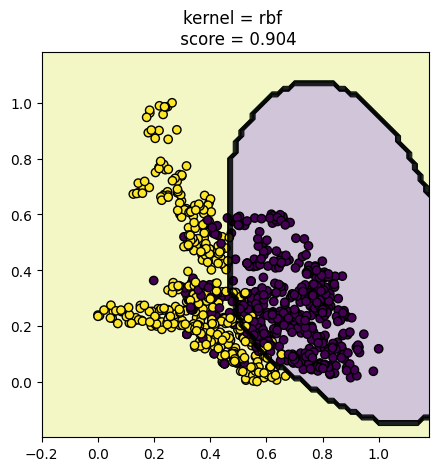

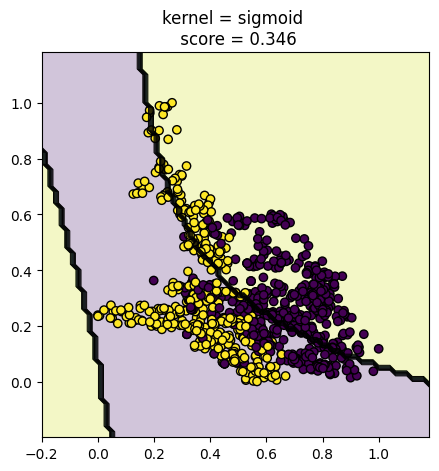

In [124]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for each in kernels:
    clf = SVC(kernel=each).fit(X_train, y_train)
    plot_db(X_train, y_train, clf, "kernel = {} \n score = {}".format(each, round(clf.score(X_valid, y_valid), 3)))
    